# Project: Drugs, Side Effects and Medical Condition

## Step 1: Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Step 2: Load the Dataset

In [2]:
df = pd.read_csv(r'C:\Users\sharm\Downloads\drugs_side_effects_drugs_com.csv')  
df.head()


,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


## Step 3: Data Cleaning

##### Before we start analyzing the data, it's essential to clean it. We'll check for any missing values and decide how to handle them. In this case, we'll either fill missing values with a placeholder or drop them.

#### Checking for missing values in the dataset

In [3]:
df.isnull().sum()

drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64

#### Fill missing values in specific columns with 'Unknown' without using inplace=True


In [4]:
df['drug_classes'] = df['drug_classes'].fillna('Unknown')
df['brand_names'] = df['brand_names'].fillna('Unknown')
df['pregnancy_category'] = df['pregnancy_category'].fillna('Unknown')
df['csa'] = df['csa'].fillna('Unknown')

#### Drop rows where 'rating' is missing

In [5]:
df_cleaned = df.dropna(subset=['rating'])

#### Standardizing text columns to lowercase using .loc

In [6]:
df_cleaned.loc[:, 'drug_classes'] = df_cleaned['drug_classes'].str.lower()
df_cleaned.loc[:, 'brand_names'] = df_cleaned['brand_names'].str.lower()

#### Remove duplicate rows if any

In [7]:
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"miscellaneous antimalarials, tetracyclines","acticlate, adoxa ck, adoxa pak, adoxa tt, alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"aldosterone receptor antagonists, potassium-sp...","aldactone, carospir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,tetracyclines,"dynacin, minocin, minolira, solodyn, ximino, v...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"miscellaneous antineoplastics, miscellaneous u...",unknown,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"topical acne agents, vaginal anti-infectives","cleocin t, clindacin etz, clindacin p, clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


## Step 4: Basic Data Exploration

#### Summary statistics for the numerical columns in the dataset

In [8]:
df.describe()

,rating,no_of_reviews
count,1586.000000,1586.000000
mean,6.812926,75.064943
std,2.313044,184.900847
min,0.000000,1.000000
25%,5.600000,2.000000
50%,7.000000,12.000000
75%,8.500000,58.000000
max,10.000000,2934.000000


#### Visualizing the Distribution of Drug Ratings

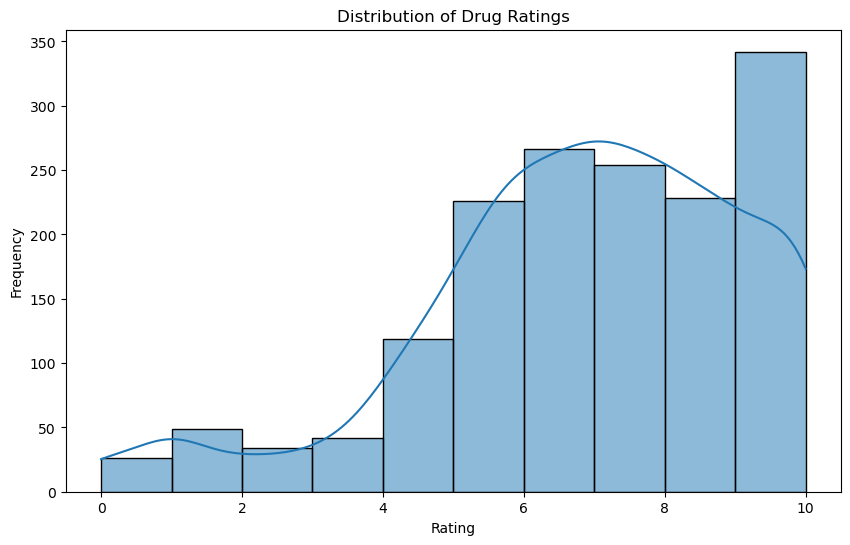

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True)  # kde=True adds a smooth curve
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


## Step 5: Analyzing Relationships

#### Top Drugs by Medical Condition

##### Let’s see which drugs are most commonly prescribed for different medical conditions by Counting the most common drugs for each medical condition

In [10]:
top_drugs = df.groupby('medical_condition')['drug_name'].value_counts().nlargest(10)
print(top_drugs)


medical_condition  drug_name     
Acne               minocycline       2
Eczema             fluocinolone      2
Herpes             acyclovir         2
ADHD               Adderall          1
                   Adderall XR       1
                   Adhansia XR       1
                   Adzenys ER        1
                   Adzenys XR-ODT    1
                   Aptensio XR       1
                   Azstarys          1
Name: count, dtype: int64


#### Most Common Side Effects

##### We will now analyze the most common side effects across all the drugs. This helps us identify patterns in how drugs might affect patients.

In [11]:
side_effects = df['side_effects'].value_counts().head(10)
print(side_effects)


side_effects
hives ; difficult breathing; swelling of your face, lips, tongue, or throat. This medicine may cause serious side effects. Stop using this medicine and call your doctor at once if you have: redness or swelling of the treated area; increased pain; or severe burning or skin irritation such as a rash, itching, pain, or blistering. Less serious side effects may be more likely, and you may have none at all.                                                                                                                                                                                           10
hives ; difficult breathing; swelling of your face, lips, tongue, or throat. This medicine may cause serious side effects. Stop using this medicine and call your doctor at once if you have: bone pain, muscle weakness; confusion, changes in your mental state, seizure (convulsions); or pale skin, feeling light-headed or short of breath, rapid heart rate. Less serious side effects may be more

#### Drug Ratings by Class

##### Finally, let’s explore how the ratings differ for various drug classes by creating a box plot. This will give us an idea of the spread of ratings within each class.

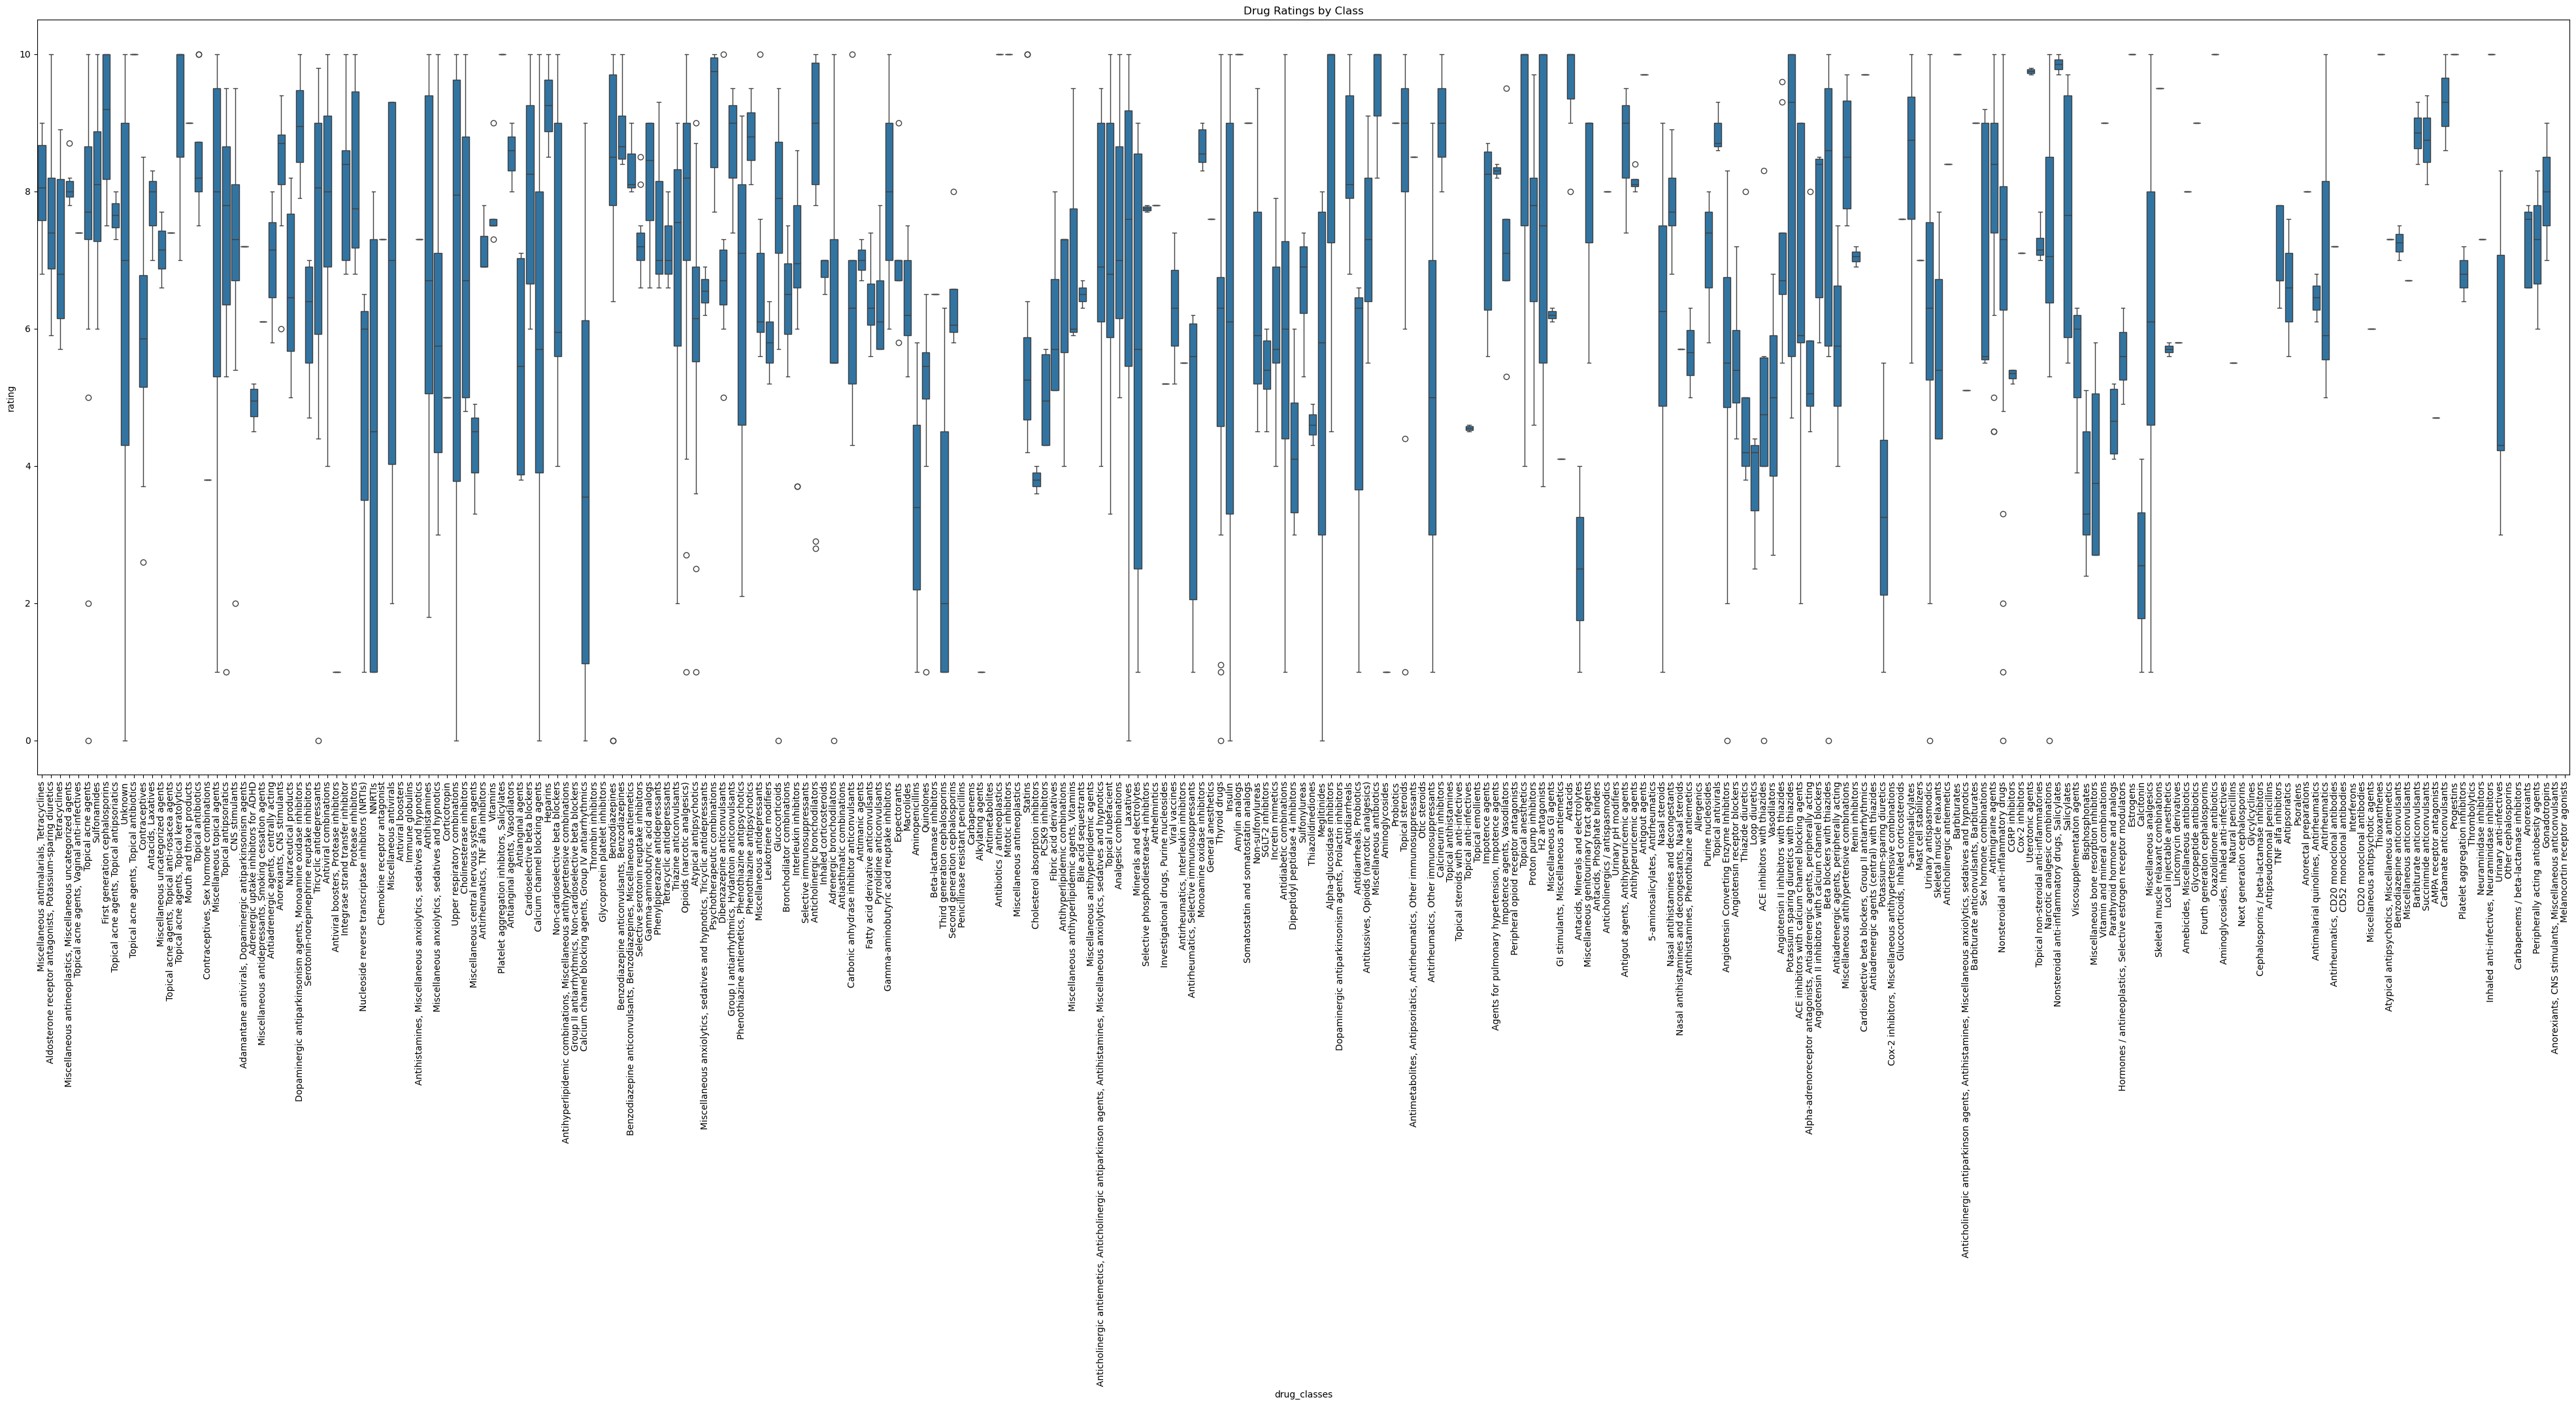

In [12]:
plt.figure(figsize=(50, 15))
sns.boxplot(x='drug_classes', y='rating', data=df)
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.title('Drug Ratings by Class')
plt.show()


#### Correlation Analysis

##### We can explore relationships between numeric columns using a correlation matrix. This can help you identify any strong relationships between variables.

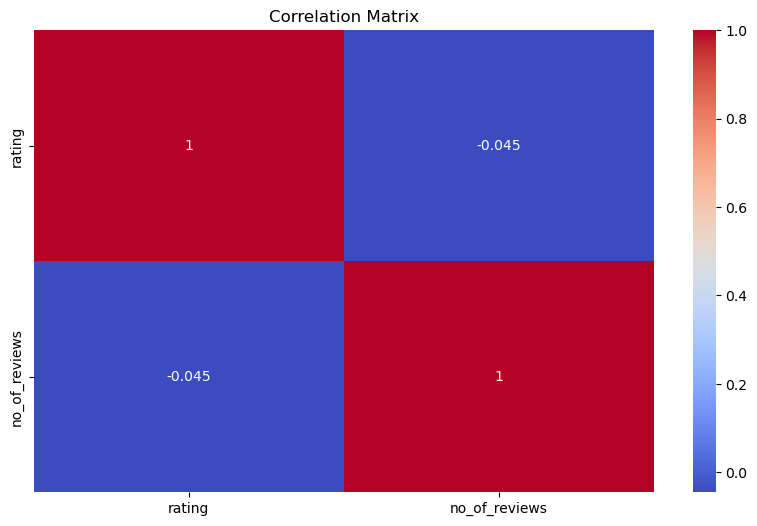

In [13]:
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### Most Common Drug Classes

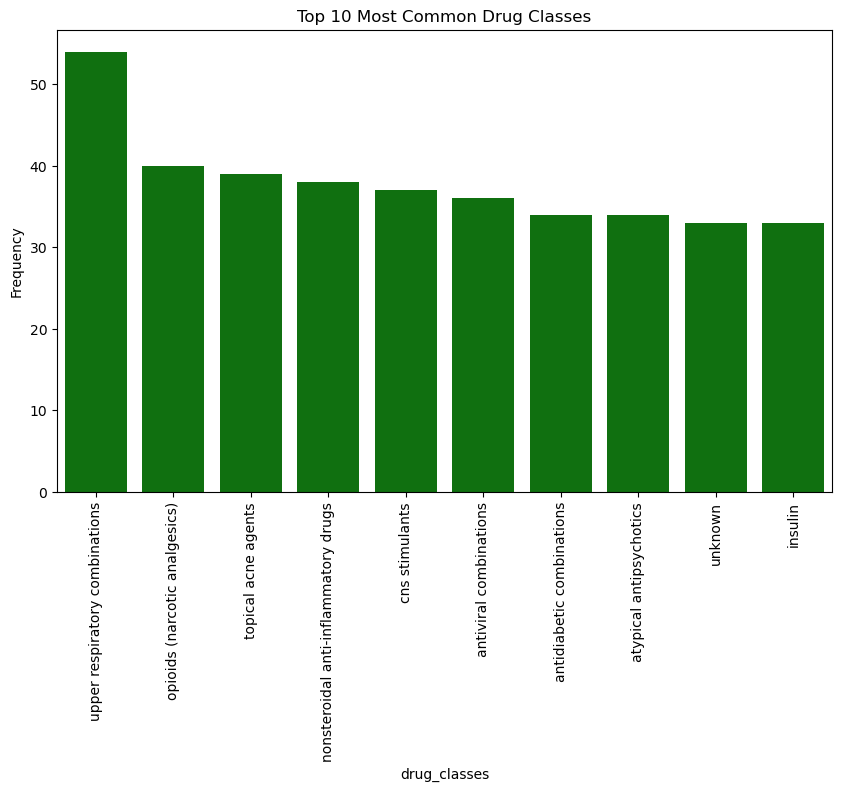

In [14]:
top_drug_classes = df_cleaned['drug_classes'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_drug_classes.index, y=top_drug_classes.values, color='g')
plt.xticks(rotation=90)
plt.title('Top 10 Most Common Drug Classes')
plt.ylabel('Frequency')
plt.show()


#### Pregnancy Category Analysis

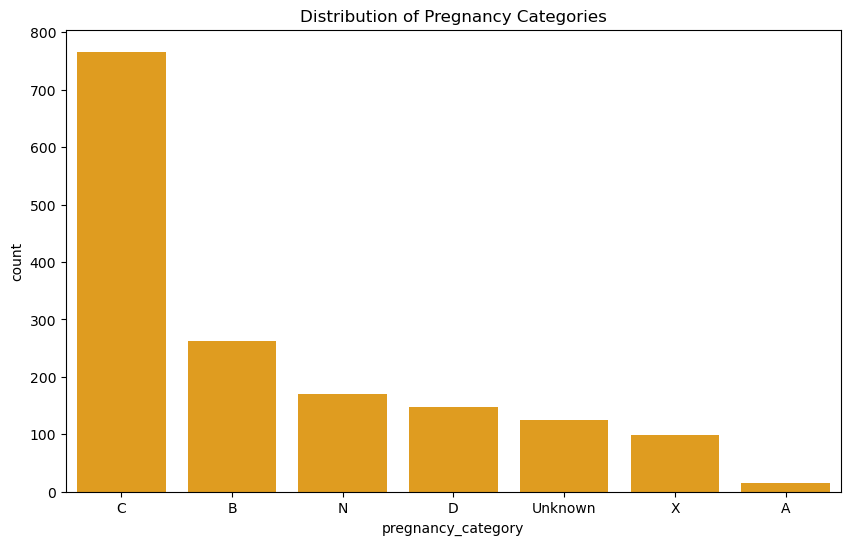

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='pregnancy_category', data=df_cleaned,color='orange', order=df_cleaned['pregnancy_category'].value_counts().index)
plt.title('Distribution of Pregnancy Categories')
plt.show()


## Step 6: Conclusion

### Summarize your findings based on the analysis you just did. For example:

#### 1. Distribution of Ratings: The ratings are mostly clustered between 7 and 10, with a few outliers.
#### 2. Top Drugs for Conditions: We identified the top 10 drugs commonly prescribed for certain conditions.
#### 3. Side Effects: Some side effects are more frequently reported, such as nausea, headaches, and dizziness.
#### 4. Drug Classes and Ratings: Some drug classes tend to have higher ratings than others, indicating higher effectiveness.
